# Singular Value Decomposition #

## Introduction  
This notebook demonstrates fundamental matrix algebra operations in Python using the NumPy library. 'Singular Vale Decomposition' will be utilized on an image to showcase file space effeciency and image readability.

### 1. Import Libraries 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### 2. Load Image into an Array

In [2]:
A = cv2.imread('C:/Users/krist/OneDrive/Desktop/Professional/GitHub/MatrixAlgebra/redpanda.jpeg', 0)

### 3. Matrix Algebra

The goal is to load an image, convert it into greyscale, then visualize various rank approximations up to 75% of the original image.

In [3]:
# Perform Singular Value Decomposition (SVD) on matrix A to decompose it into U, S, and V^T matrices
U, S, V_t = np.linalg.svd(A, full_matrices=False)

# E represents the total sum of the singular values of the matrix A.
# E75 represents 75% of the total sum of the singular values.
TotalE = np.sum(S)  # Calculate the total sum of singular values
E75 = 0.75 * TotalE  # Calculate target sum of singular values

Sum = 0
SmallR = np.zeros(len(S))  # Pre-allocate the array to store cumulative sums

# Iterate over the singular values and calculate the cumulative sum until it exceeds the target sum
for n in range(len(S)):
    Sum += S[n]  # Add the current singular value to the cumulative sum
    SmallR[n] = Sum  # Store the cumulative sum in SmallR
    if Sum >= E75: 
        break

A15 = len(SmallR)  # The number of singular values required to capture 75% of the original image; our rank-R approximation

### 4. Visualization

C:\Users\krist\AppData\Local\Temp\ipykernel_16020\2279531854.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


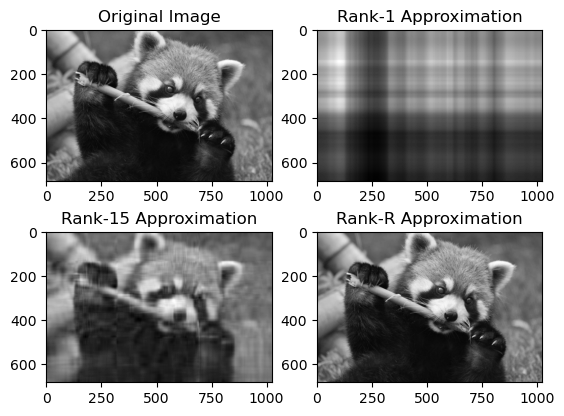

In [4]:
S_mat = np.diag(S)
rank1 = (U[:,0:1]@S_mat[0:1,0:1])@V_t[0:1,:]
rank15 = (U[:,0:15]@S_mat[0:15,0:15])@V_t[0:15,:]
rankR = (U[:,0:A15]@S_mat[0:A15,0:A15])@V_t[0:A15,:]
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(A, cmap='gray')
ax[0, 1].imshow(rank1, cmap='gray')
ax[1, 0].imshow(rank15, cmap='gray')
ax[1, 1].imshow(rankR, cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,1].set_title('Rank-1 Approximation')
ax[1,0].set_title('Rank-15 Approximation')
ax[1,1].set_title('Rank-R Approximation')
fig.show()